# Library

In [1]:

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone

# Modeling
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from IPython.display import display, Markdown

# Statistics
from scipy.stats import mannwhitneyu, chi2_contingency

# Others
import warnings
warnings.filterwarnings('ignore')

# FUNGSI UTILITAS
# =============================================
def print_header(text, level=2):
    """Menampilkan header dengan format markdown"""
    display(Markdown(f"{'#'*level} {text}"))
    
def print_info(text):
    """Menampilkan informasi dengan format markdown"""
    display(Markdown(f"**INFO:** {text}"))


# Data Understanding

## Load Data

In [2]:
df = pd.read_csv('training_dataset.csv')
print_header("Data Understanding", 1)

# Tampilkan informasi dasar
print_header("Data Sample", 3)
display(df.head())

print_header("Data Info", 3)
display(df.info())

# Data Understanding

### Data Sample

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


### Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

None

In [3]:
df.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


## Analisis deskriptif

### Analisis Deskriptif

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customer_number,int64,0,0.0,22916,"[531036, 999241, 995002, 932750, 684699, 687725, 884790, 138535, 300611, 423882, 102988, 602281, 396740, 974639, 885539, 707553, 103155, 202655, 310543, 690771, 520862, 112175, 832931, 944698, 790319, 656657, 724992, 666434, 341196, 415787, 526573, 155869, 375703, 787769, 648662, 461948, 211227, 487054, 928270, 970584, 661071, 325590, 209079, 189248, 447956, 139819, 679927, 957643, 191481, 714247, 830184, 840111, 191193, 574220, 437073, 136554, 812567, 285592, 638322, 236315, 260448, 326136, 930016, 617025, 649797, 495382, 711009, 452912, 618276, 469761, 545362, 601299, 619598, 650037, 232685, 198132, 783142, 688221, 822445, 360256, 310232, 370034, 624716, 691795, 455526, 179391, 960357, 576130, 810702, 959287, 617908, 365511, 769161, 164733, 742597, 825715, 678732, 796579, 610922, 682905, ...]"
1,usia,int64,0,0.0,78,"[63, 43, 29, 40, 34, 31, 37, 30, 54, 32, 39, 33, 48, 36, 47, 50, 45, 38, 44, 28, 25, 42, 57, 26, 24, 51, 53, 56, 27, 49, 46, 52, 35, 23, 55, 58, 41, 60, 61, 88, 67, 20, 62, 22, 59, 66, 72, 64, 78, 70, 69, 75, 19, 18, 92, 76, 83, 21, 82, 71, 17, 77, 81, 68, 73, 79, 80, 65, 86, 74, 85, 84, 91, 94, 89, 95, 87, 98]"
2,pekerjaan,object,0,0.0,12,"[sosial media specialis, teknisi, pekerja kasar, manajer, asisten rumah tangga, mahasiswa, penyedia jasa, pemilik bisnis, entrepreneur, pengangguran, pensiunan, unknown]"
3,status_perkawinan,object,0,0.0,4,"[menikah, lajang, cerai, unknown]"
4,pendidikan,object,0,0.0,8,"[Pendidikan Tinggi, SMA, Tidak Tamat SD, SMP, Diploma, SD, unknown, TIDAK SEKOLAH]"
5,gagal_bayar_sebelumnya,object,0,0.0,3,"[no, unknown, yes]"
6,pinjaman_rumah,object,0,0.0,3,"[yes, no, unknown]"
7,pinjaman_pribadi,object,0,0.0,3,"[no, yes, unknown]"
8,jenis_kontak,object,0,0.0,2,"[cellular, telephone]"
9,bulan_kontak_terakhir,object,0,0.0,10,"[jul, nov, may, aug, oct, apr, jun, sep, mar, dec]"


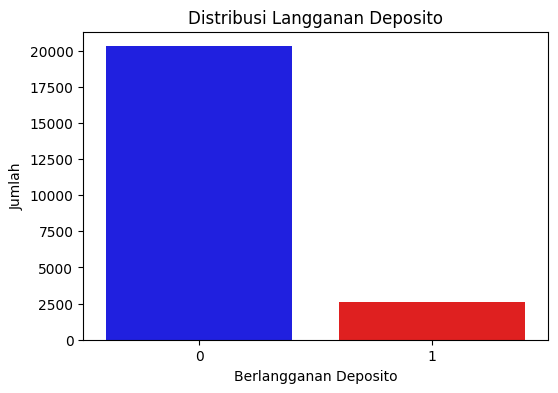

In [4]:
print_header("Analisis Deskriptif", 3)
df_showall = df.copy()
listItem = []
for col in df_showall.columns:
    pd.set_option('display.max_colwidth', None)
    listItem.append([col, df_showall[col].dtype, df_showall[col].isna().sum(), round((df_showall[col].isna().sum()/len(df_showall[col]))*100, 2),
                    df_showall[col].nunique(), list(df_showall[col].unique())])

df_showall_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
display(df_showall_desc)

# Visualisasi target variable
plt.figure(figsize=(6,4))
sns.countplot(x='berlangganan_deposito', data=df, palette=['blue', 'red'])
plt.title('Distribusi Langganan Deposito')
plt.xlabel('Berlangganan Deposito')
plt.ylabel('Jumlah')
plt.show()

# Data Cleaning

# Data Cleaning

### Penanganan Missing Values

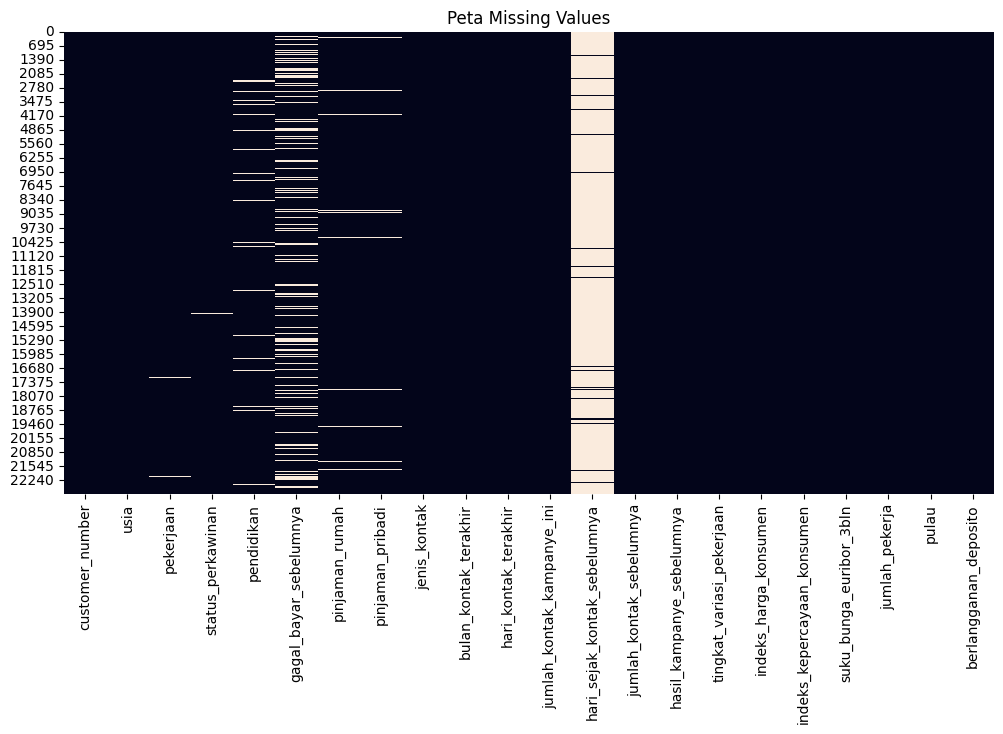


Analisis untuk usia:
Deposit=1 & missing: 0
Deposit=0 & missing: 0

Analisis untuk pendidikan:
Deposit=1 & missing: 144
Deposit=0 & missing: 848

Analisis untuk pekerjaan:
Deposit=1 & missing: 21
Deposit=0 & missing: 172

Analisis untuk status_perkawinan:
Deposit=1 & missing: 8
Deposit=0 & missing: 39

Analisis untuk gagal_bayar_sebelumnya:
Deposit=1 & missing: 248
Deposit=0 & missing: 4497

Analisis untuk pinjaman_rumah:
Deposit=1 & missing: 73
Deposit=0 & missing: 506

Analisis untuk pinjaman_pribadi:
Deposit=1 & missing: 73
Deposit=0 & missing: 506

Analisis untuk hari_sejak_kontak_sebelumnya:
Deposit=1 & missing: 0
Deposit=0 & missing: 0


In [5]:
print_header("Data Cleaning", 1)

# Handle missing values
print_header("Penanganan Missing Values", 3)
df_clean = df.copy()

# Konversi 'unknown' ke NaN
df_clean = df_clean.replace('unknown', np.nan)
df_clean['hari_sejak_kontak_sebelumnya'] = df_clean['hari_sejak_kontak_sebelumnya'].replace(999, np.nan)

# Visualisasi missing values
plt.figure(figsize=(12,6))
sns.heatmap(data=df_clean.isna(), cbar=False)
plt.title('Peta Missing Values')
plt.show()

# Analisis missing values vs target
missing_cols = ['usia','pendidikan', 'pekerjaan', 'status_perkawinan', 'gagal_bayar_sebelumnya', 
                'pinjaman_rumah', 'pinjaman_pribadi','hari_sejak_kontak_sebelumnya']

for col in missing_cols:
    print(f"\nAnalisis untuk {col}:")
    print(f"Deposit=1 & missing: {len(df[(df[col]=='unknown') & (df['berlangganan_deposito']==1)])}")
    print(f"Deposit=0 & missing: {len(df[(df[col]=='unknown') & (df['berlangganan_deposito']==0)])}")

In [6]:
# df.drop(df[df['pekerjaan'] == 'unknown'].index, inplace= True)
# df.drop(df[df['status_perkawinan'] == 'unknown'].index, inplace= True)
# print('Missing value fitur job', len(df[df['pekerjaan'] == 'unknown']))
# print('Missing value fitur marital', len(df[df['status_perkawinan'] == 'unknown']))

In [7]:
# # Ganti nilai 999 menjadi 0 pada kolom pdays
# df['hari_sejak_kontak_sebelumnya'] = df['hari_sejak_kontak_sebelumnya'].replace(999, 0)

# # Ganti semua nilai 'unknown' yang ada dikolom education, housing, dan loan menjadi NaN
# df[['pendidikan','pinjaman_rumah','pinjaman_pribadi']] = df[['pendidikan','pinjaman_rumah','pinjaman_pribadi']].replace('unknown', np.nan)

# # Mengisi missing value pada fitur education menggunakan modus
# missing_cat = ['pendidikan']
# for cat in missing_cat:
#   df[cat].fillna(df[cat].mode()[0], inplace= True)

# # Isi missing value pada kolom housing, dan loan menggunakan KNN
# df['pinjaman_rumah'] = np.where(df['pinjaman_rumah'] == 'yes', 1, 0)
# df['pinjaman_pribadi'] = np.where(df['pinjaman_pribadi'] == 'yes', 1, 0)
# imputer = KNNImputer(n_neighbors=5)
# df[['pinjaman_rumah', 'pinjaman_pribadi']] = imputer.fit_transform(df[['pinjaman_rumah', 'pinjaman_pribadi']])

# # Mengubah kembali representasi nilai 1 dan 0 ke data aslinya
# df['pinjaman_rumah'] = df['pinjaman_rumah'].replace({1:'yes', 0:'no'})
# df['pinjaman_pribadi'] = df['pinjaman_pribadi'].replace({1:'yes', 0:'no'})

In [8]:
df_model = df.copy()
df_model.drop(df_model[df_model['pendidikan'] == 'illiterate'].index, inplace= True)

In [9]:
# Handle outlier
print_header("Penanganan Outlier", 3)

df_filter = df_model[df_model['hari_sejak_kontak_sebelumnya'] != 0]
stast, pvalue = mannwhitneyu(
    df_filter[df_filter['berlangganan_deposito'] == 1]['hari_sejak_kontak_sebelumnya'],
    df_filter[df_filter['berlangganan_deposito'] == 0]['hari_sejak_kontak_sebelumnya'],
    alternative= 'two-sided'
)
if pvalue > 0.05:
  print('pvalue:', pvalue, '\n')
  print('Tidak cukup bukti untuk menolak H0. Tidak ada perbedaan yang signifikan antara distribusi data jarak kontak terkhir (dalam hari) kepada orang yang menempatkan deposito dan yang tidak')
else:
  print('pvalue:', pvalue, '\n')
  print('Cukup bukti untuk menolak H0. Ha diterima. Ada perbedaan yang signifikan antara distribusi data jarak kontak terkhir (dalam hari) kepada orang yang menempatkan deposito dan yang tidak')

### Penanganan Outlier

pvalue: 0.0 

Cukup bukti untuk menolak H0. Ha diterima. Ada perbedaan yang signifikan antara distribusi data jarak kontak terkhir (dalam hari) kepada orang yang menempatkan deposito dan yang tidak


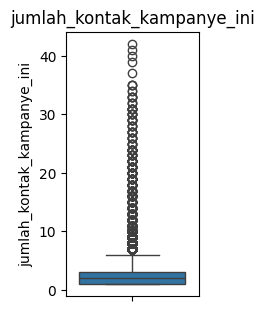

In [10]:
plt.figure(figsize=(8, 6))
for i, j in enumerate(df_model[['jumlah_kontak_kampanye_ini']].columns):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df_model[j])
    plt.title(j)
plt.tight_layout()
plt.show()

In [11]:
df_model[df_model['berlangganan_deposito'] == 1].sort_values(by='jumlah_kontak_kampanye_ini')

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
11600,146853,48,manajer,menikah,Pendidikan Tinggi,no,no,yes,cellular,nov,...,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,NTT,1
8811,234696,75,pensiunan,menikah,unknown,no,no,no,cellular,sep,...,999,1,failure,-3.4,92.379,-29.8,0.788,5017.5,Sulawesi,1
17258,836834,30,sosial media specialis,lajang,Pendidikan Tinggi,no,no,yes,cellular,apr,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,Sulawesi,1
8800,200397,53,sosial media specialis,menikah,SMA,no,no,no,cellular,jul,...,999,1,failure,-2.9,92.469,-33.6,1.044,5076.2,Jawa,1
8783,318335,42,sosial media specialis,menikah,Pendidikan Tinggi,no,no,no,cellular,jun,...,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,Kalimantan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676,294629,39,sosial media specialis,menikah,Pendidikan Tinggi,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,Jawa,1
611,662322,42,pemilik bisnis,menikah,Pendidikan Tinggi,no,yes,no,telephone,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,Sulawesi,1
20701,802819,56,pekerja kasar,menikah,Tidak Tamat SD,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,NTT,1
17430,232994,26,unknown,lajang,SMA,unknown,yes,yes,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,NTB,1


In [12]:
df_model.drop(df_model[(df_model['jumlah_kontak_kampanye_ini'] > 12)].index, inplace=True)

In [13]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22593 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22593 non-null  int64  
 1   usia                          22593 non-null  int64  
 2   pekerjaan                     22593 non-null  object 
 3   status_perkawinan             22593 non-null  object 
 4   pendidikan                    22593 non-null  object 
 5   gagal_bayar_sebelumnya        22593 non-null  object 
 6   pinjaman_rumah                22593 non-null  object 
 7   pinjaman_pribadi              22593 non-null  object 
 8   jenis_kontak                  22593 non-null  object 
 9   bulan_kontak_terakhir         22593 non-null  object 
 10  hari_kontak_terakhir          22593 non-null  object 
 11  jumlah_kontak_kampanye_ini    22593 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22593 non-null  int64  
 13  jumlah

# Data Analisis

In [14]:
df_analysis = df_model.copy()

In [15]:
numeric = df_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df_analysis.select_dtypes(include='object').columns.tolist()


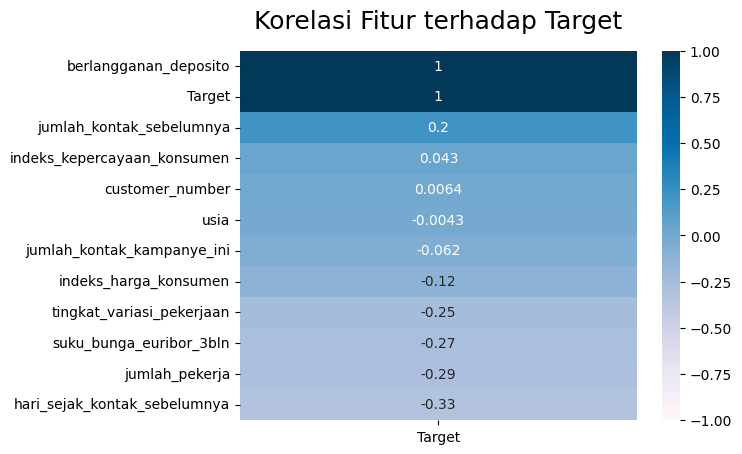

In [16]:
df_heatmap = df_analysis.copy()
df_heatmap['Target'] = df_heatmap['berlangganan_deposito'].apply(lambda x : 1 if x == 1 else 0)
df_heatmap_corr = df_heatmap.corr(numeric_only=True,method='spearman')[['Target']]
heatmap = sns.heatmap(df_heatmap_corr.sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuBu')
heatmap.set_title('Korelasi Fitur terhadap Target', fontdict={'fontsize':18}, pad=16)
plt.show()

## Analisis Univariat

In [17]:
numeric

['customer_number',
 'usia',
 'jumlah_kontak_kampanye_ini',
 'hari_sejak_kontak_sebelumnya',
 'jumlah_kontak_sebelumnya',
 'tingkat_variasi_pekerjaan',
 'indeks_harga_konsumen',
 'indeks_kepercayaan_konsumen',
 'suku_bunga_euribor_3bln',
 'jumlah_pekerja',
 'berlangganan_deposito']

### Numerik

In [18]:
df_analysis.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000,22593.000000
mean,551077.875935,40.004161,2.327092,961.728013,0.172354,0.061444,93.570538,-40.485203,3.600796,5166.062156,0.115478
std,259833.068102,10.444778,1.860779,188.745766,0.493444,1.579524,0.580725,4.659866,1.742201,72.661179,0.319605
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325770.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553207.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,777243.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,12.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


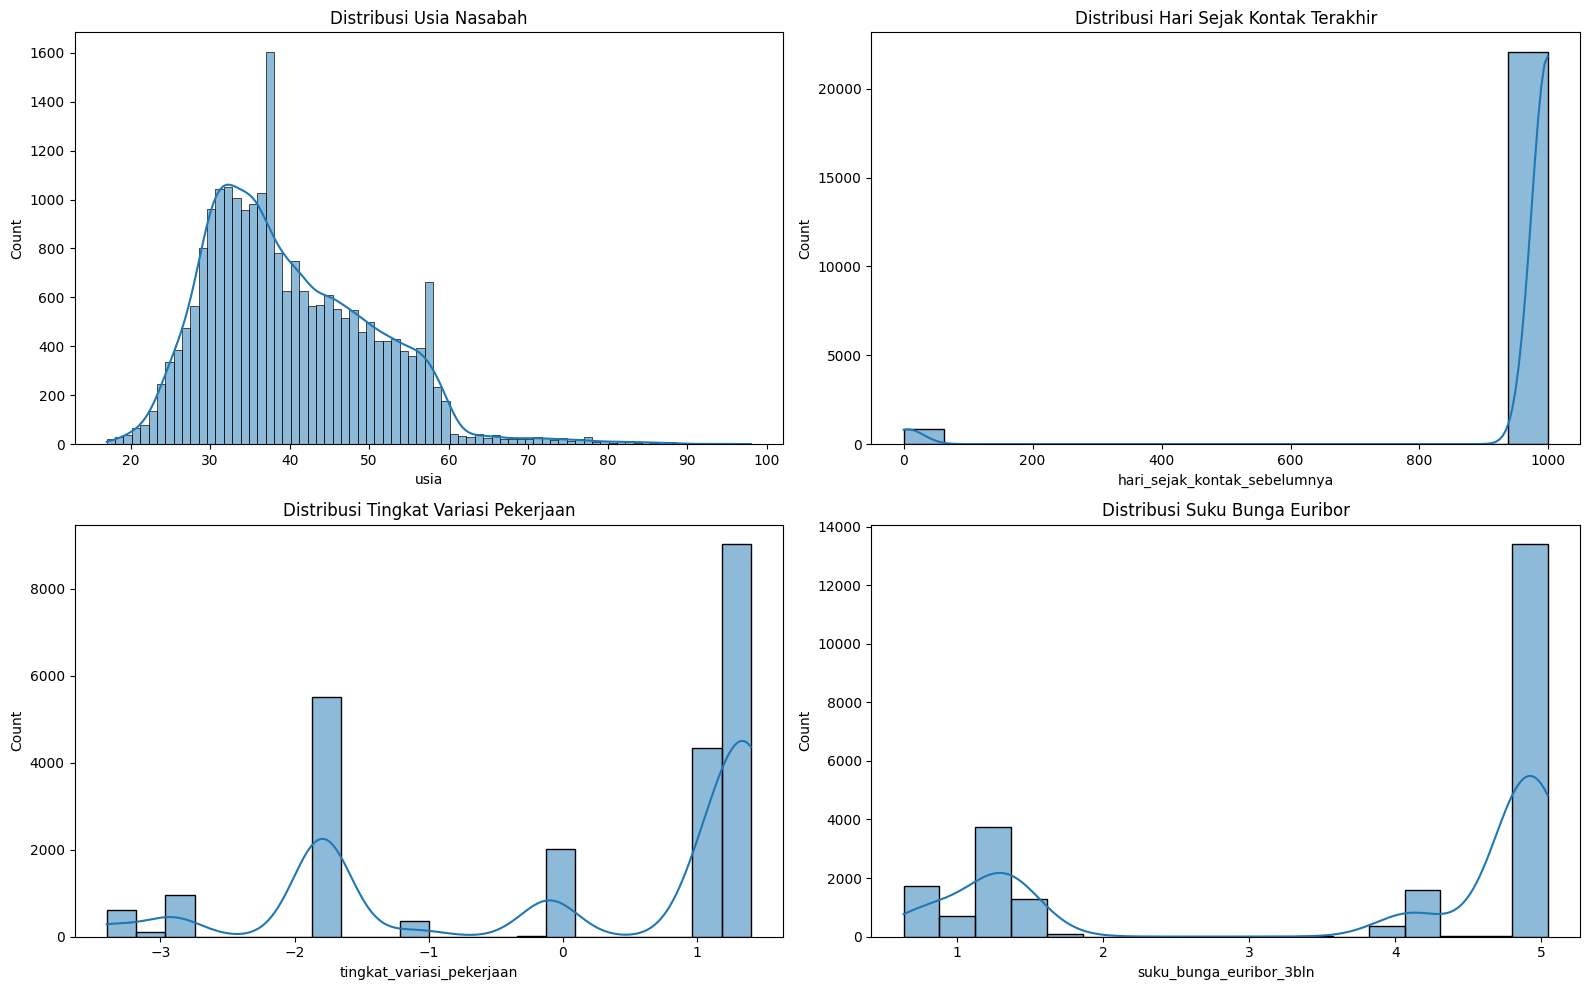

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(df['usia'], kde=True, ax=axes[0, 0]).set_title('Distribusi Usia Nasabah')
sns.histplot(df['hari_sejak_kontak_sebelumnya'], kde=True, ax=axes[0, 1]).set_title('Distribusi Hari Sejak Kontak Terakhir')
sns.histplot(df['tingkat_variasi_pekerjaan'], kde=True, ax=axes[1, 0]).set_title('Distribusi Tingkat Variasi Pekerjaan')
sns.histplot(df['suku_bunga_euribor_3bln'], kde=True, ax=axes[1, 1]).set_title('Distribusi Suku Bunga Euribor')
plt.tight_layout()
plt.show()

### Categorical

In [20]:
categorical

['pekerjaan',
 'status_perkawinan',
 'pendidikan',
 'gagal_bayar_sebelumnya',
 'pinjaman_rumah',
 'pinjaman_pribadi',
 'jenis_kontak',
 'bulan_kontak_terakhir',
 'hari_kontak_terakhir',
 'hasil_kampanye_sebelumnya',
 'pulau']

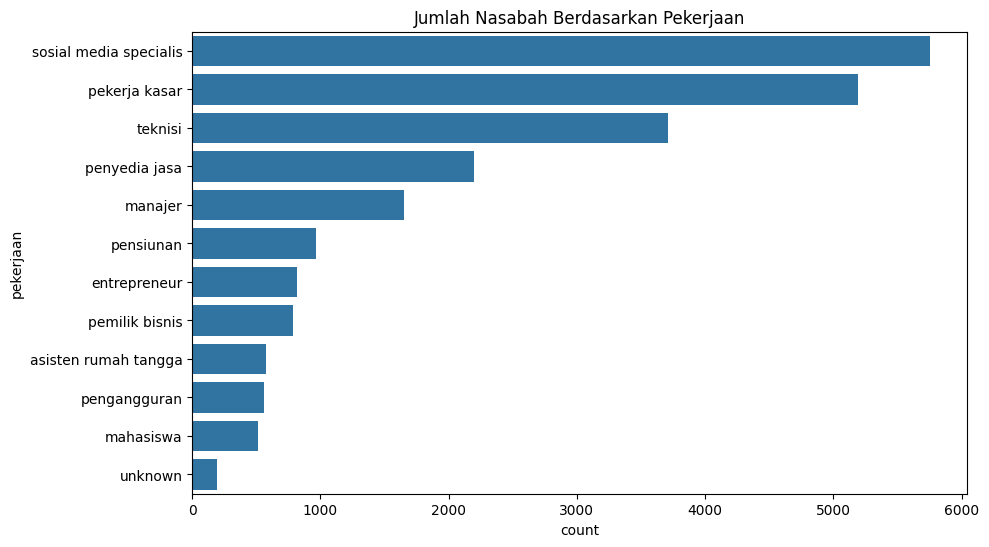

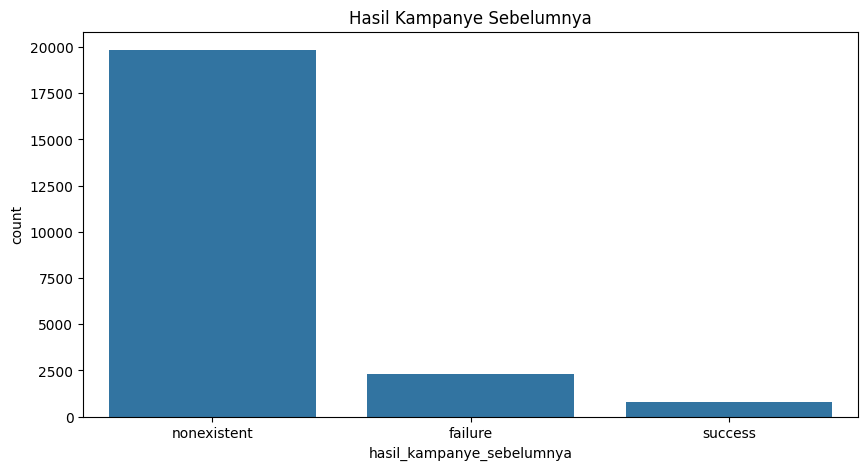

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='pekerjaan', data=df, order=df['pekerjaan'].value_counts().index)
plt.title('Jumlah Nasabah Berdasarkan Pekerjaan')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='hasil_kampanye_sebelumnya', data=df)
plt.title('Hasil Kampanye Sebelumnya')
plt.show()

### numerik vs target

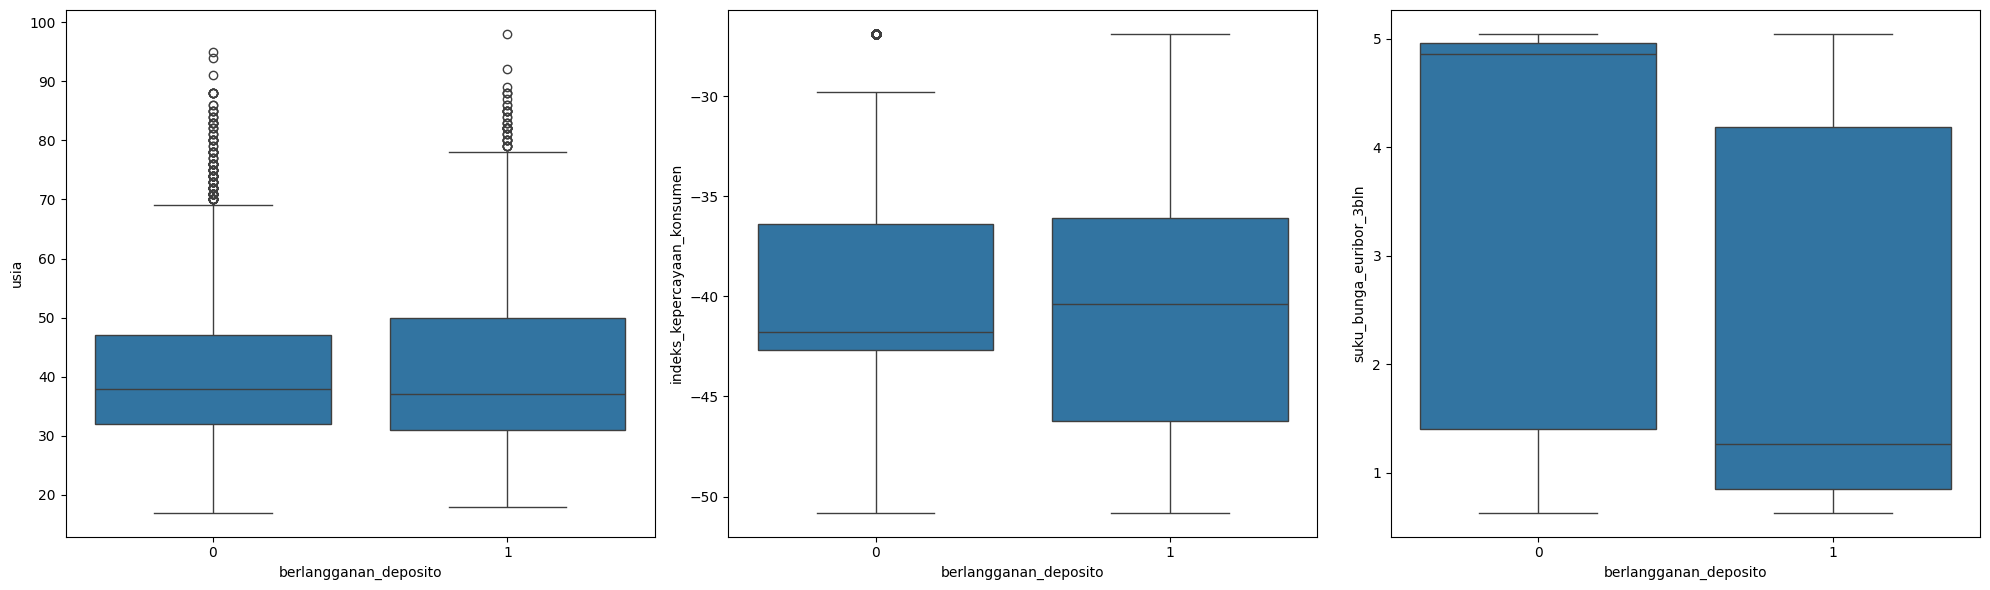

In [22]:
# Membandingkan beberapa fitur numerik dengan target
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(data=df, x='berlangganan_deposito', y='usia', ax=axes[0])
sns.boxplot(data=df, x='berlangganan_deposito', y='indeks_kepercayaan_konsumen', ax=axes[1])
sns.boxplot(data=df, x='berlangganan_deposito', y='suku_bunga_euribor_3bln', ax=axes[2])
plt.tight_layout()
plt.show()

### kategori vs target

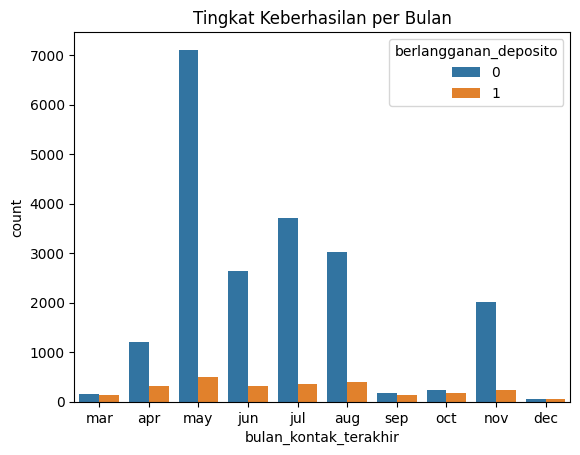

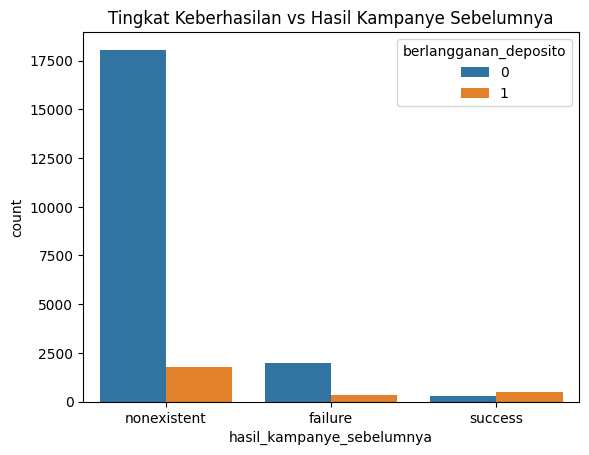

In [23]:
# Melihat proporsi target di setiap kategori
sns.countplot(data=df, x='bulan_kontak_terakhir', hue='berlangganan_deposito', order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Tingkat Keberhasilan per Bulan')
plt.show()

sns.countplot(data=df, x='hasil_kampanye_sebelumnya', hue='berlangganan_deposito')
plt.title('Tingkat Keberhasilan vs Hasil Kampanye Sebelumnya')
plt.show()

# Analisis Musiman

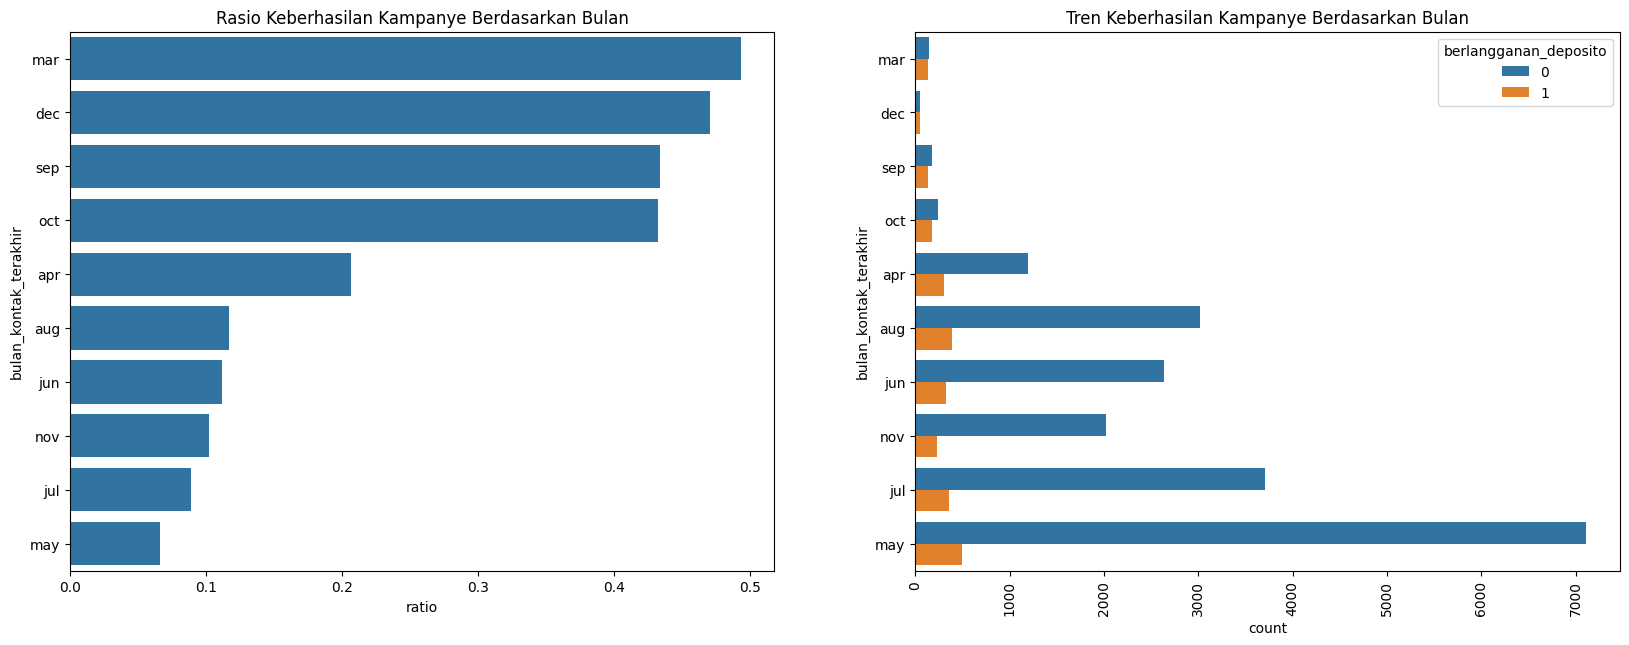

In [24]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

dfratio = df_analysis[['bulan_kontak_terakhir','usia']].groupby(['bulan_kontak_terakhir'],as_index=False).count()
dfratio['berlangganan_deposito'] = df_analysis[df_analysis['berlangganan_deposito'] == 1 ][['bulan_kontak_terakhir','usia']].groupby(['bulan_kontak_terakhir']).count().values
dfratio['ratio'] = dfratio['berlangganan_deposito']/dfratio['usia']
dfratio.sort_values('ratio',ascending=False)
plot2=sns.barplot(data=dfratio, y='bulan_kontak_terakhir', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['bulan_kontak_terakhir'],ax=axes[0])
axes[0].set_title('Rasio Keberhasilan Kampanye Berdasarkan Bulan')

axes[1].set_title('Tren Keberhasilan Kampanye Berdasarkan Bulan')
plot1=sns.countplot(hue = 'berlangganan_deposito', y = 'bulan_kontak_terakhir', data = df,order=dfratio.sort_values(by='ratio',ascending=False)['bulan_kontak_terakhir'],ax=axes[1])
plt.xticks(rotation=90)

plt.show()

In [25]:
jumlah_pekerja  = df_analysis[['jumlah_pekerja','bulan_kontak_terakhir']].groupby('bulan_kontak_terakhir',as_index=False).mean().reindex([5,0,6,4,3,1,9,8,7,2])
jumlah_pekerja 

,bulan_kontak_terakhir,jumlah_pekerja
5,mar,5053.581690
0,apr,5093.626680
6,may,5149.959836
4,jun,5195.377848
3,jul,5213.485874
1,aug,5198.078597
9,sep,4989.185443
8,oct,5018.141568
7,nov,5172.915963
2,dec,5033.986275


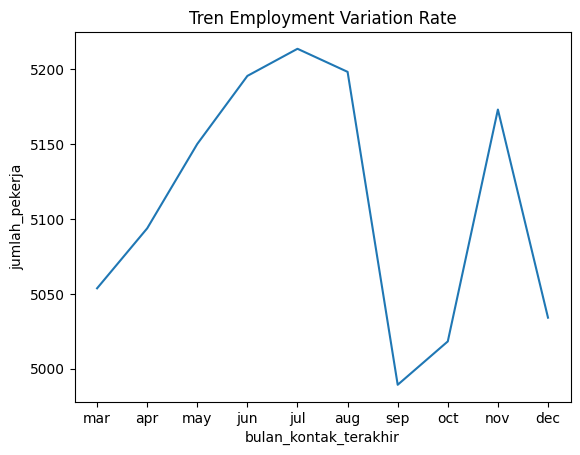

In [26]:
plt.title('Tren Employment Variation Rate')
sns.lineplot(data = jumlah_pekerja, x='bulan_kontak_terakhir', y='jumlah_pekerja')
plt.xticks(range(10),['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

plt.show()

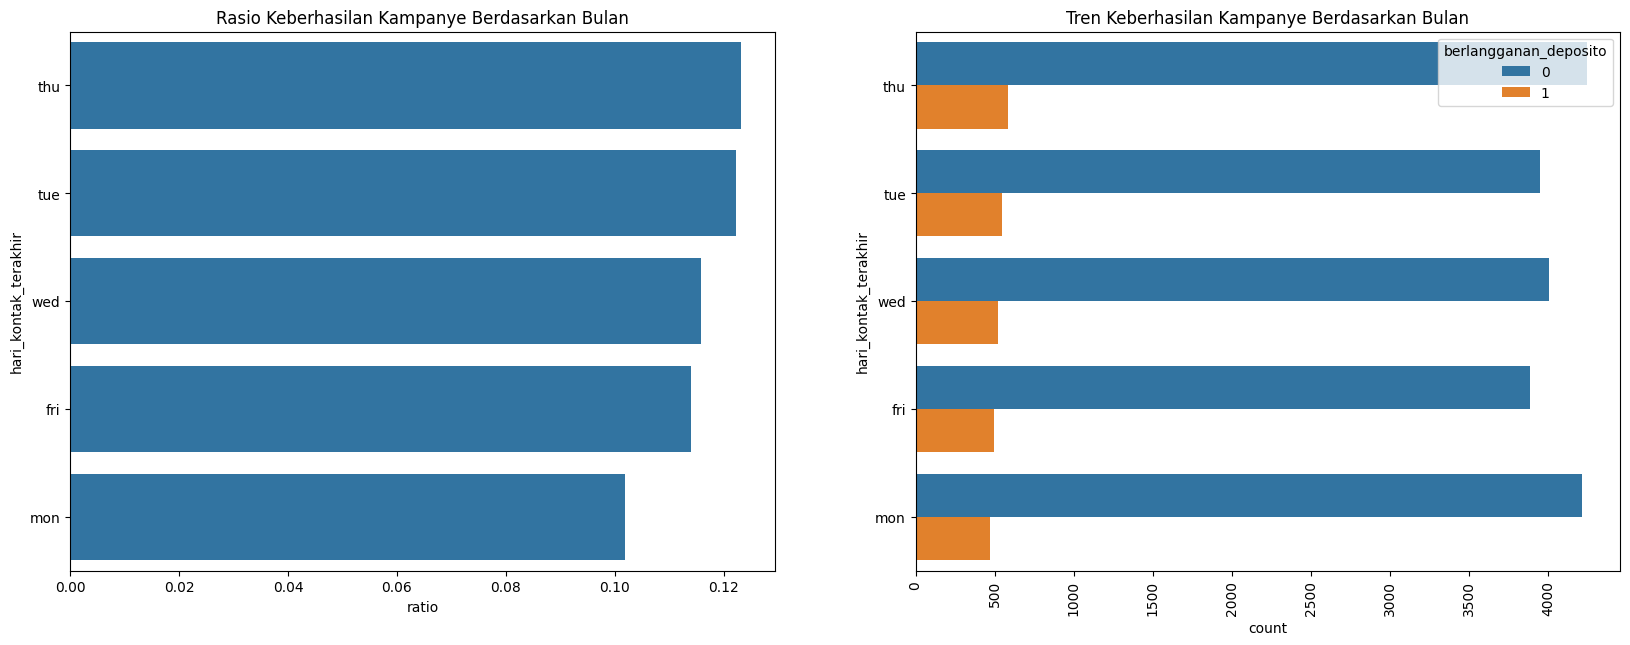

In [27]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

dfratio = df_analysis[['hari_kontak_terakhir','usia']].groupby(['hari_kontak_terakhir'],as_index=False).count()
dfratio['berlangganan_deposito'] = df_analysis[df_analysis['berlangganan_deposito'] == 1 ][['hari_kontak_terakhir','usia']].groupby(['hari_kontak_terakhir']).count().values
dfratio['ratio'] = dfratio['berlangganan_deposito']/dfratio['usia']
dfratio.sort_values('ratio',ascending=False)
plot2=sns.barplot(data=dfratio, y='hari_kontak_terakhir', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['hari_kontak_terakhir'],ax=axes[0])
axes[0].set_title('Rasio Keberhasilan Kampanye Berdasarkan Bulan')

axes[1].set_title('Tren Keberhasilan Kampanye Berdasarkan Bulan')
plot1=sns.countplot(hue = 'berlangganan_deposito', y = 'hari_kontak_terakhir', data = df,order=dfratio.sort_values(by='ratio',ascending=False)['hari_kontak_terakhir'],ax=axes[1])
plt.xticks(rotation=90)

plt.show()

# Data Processing dan feature engineering

In [28]:
print_header("Feature Engineering", 1)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Definisikan kategori untuk ordinal encoding
categories = [[None, 'Pendidikan Tinggi', 'SMA', 'Tidak Tamat SD', 'SMP', 'Diploma', 'SD', 'TIDAK SEKOLAH']]

# Buat ColumnTransformer
preprocessor = ColumnTransformer([
    ('one_hot', OneHotEncoder(), [
        'pekerjaan',
        'status_perkawinan',
        'pinjaman_rumah',
        'pinjaman_pribadi',
        'jenis_kontak',
        'bulan_kontak_terakhir',
        'hari_kontak_terakhir',
        'pulau',
        'gagal_bayar_sebelumnya'
    ]),
    ('ordinal', OrdinalEncoder(categories=categories), ['pendidikan']),
], remainder='passthrough')



# Feature Engineering

# Modelling

## split data

In [29]:
# Split data
X = df_model.drop(columns=['berlangganan_deposito', 'customer_number'])
y = df_model['berlangganan_deposito']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        stratify=y, 
        random_state=42
    )

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 18074
Jumlah data testing: 4519


In [30]:
def build_preprocessing_pipeline(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    return preprocessor

preprocessor = build_preprocessing_pipeline(X_train)

## Hypermater Tunning


In [31]:

# print_header("Hyperparameter Tuning (Randomized Search)", 1)

# from sklearn.model_selection import RandomizedSearchCV


# print_info("Memulai tuning untuk XGBoost...")

# # Definisikan pipeline sementara untuk XGBoost
# pipeline_xgb = Pipeline([
#     ('preprocessing', preprocessor), 
#     ('model', XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=42))
# ])

# param_grid_xgb = {
#     'model__learning_rate': [0.01, 0.05, 0.1],
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [3, 4, 5, 6],
#     'model__subsample': [0.7, 0.8, 0.9],
#     'model__colsample_bytree': [0.7, 0.8, 0.9]
# }

# xgb_search = RandomizedSearchCV(
#     pipeline_xgb,
#     param_distributions=param_grid_xgb,
#     n_iter=25, 
#     cv=5,
#     scoring='roc_auc',
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )
# xgb_search.fit(X_train, y_train)
# print(f"XGBoost Best AUC: {xgb_search.best_score_:.4f}")
# print(f"XGBoost Best Params: {xgb_search.best_params_}")

# print_info("Memulai tuning untuk LightGBM...")
# pipeline_lgbm = Pipeline([
#     ('preprocessing', preprocessor),
#     ('model', lgbm.LGBMClassifier(objective='binary', metric='auc', is_unbalance=True, random_state=42))
# ])

# param_grid_lgbm = {
#     'model__learning_rate': [0.01, 0.05, 0.1],
#     'model__n_estimators': [100, 200, 400],
#     'model__max_depth': [3, 4, 5, 6],
#     'model__num_leaves': [15, 21, 31],
#     'model__subsample': [0.7, 0.8, 0.9],
#     'model__colsample_bytree': [0.7, 0.8, 0.9]
# }

# lgbm_search = RandomizedSearchCV(pipeline_lgbm, param_grid_lgbm, n_iter=25, cv=5, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)
# lgbm_search.fit(X_train, y_train)
# print(f"LGBM Best AUC: {lgbm_search.best_score_:.4f}")
# print(f"LGBM Best Params: {lgbm_search.best_params_}")


# print_info("Memulai tuning untuk Random Forest...")
# pipeline_rf = Pipeline([
#     ('preprocessing', preprocessor),
#     ('model', RandomForestClassifier(class_weight='balanced_subsample', random_state=42))
# ])

# param_grid_rf = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [10, 15, 20, None],
#     'model__min_samples_split': [5, 10, 15],
#     'model__min_samples_leaf': [2, 4, 6]
# }

# rf_search = RandomizedSearchCV(pipeline_rf, param_grid_rf, n_iter=25, cv=5, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)
# rf_search.fit(X_train, y_train)
# print(f"Random Forest Best AUC: {rf_search.best_score_:.4f}")
# print(f"Random Forest Best Params: {rf_search.best_params_}")
# print_header("Hyperparameter Tuning untuk CatBoost", 1)


# numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_features = X_train.select_dtypes(include='object').columns.tolist()


# preprocessor_for_catboost = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', 'passthrough', categorical_features) 
#     ],
#     remainder='passthrough'
# )

# num_numeric_features = len(numeric_features)
# cat_feature_indices = list(range(num_numeric_features, num_numeric_features + len(categorical_features)))
# print(f"Indeks fitur kategorikal untuk CatBoost: {cat_feature_indices}")



# pipeline_catboost = Pipeline([
#     ('preprocessing', preprocessor_for_catboost),
#     ('model', CatBoostClassifier(
#         verbose=0,
#         random_state=42,
#         cat_features=cat_feature_indices
#     ))
# ])

# param_grid_catboost = {
#     'model__iterations': [200, 300, 500],
#     'model__learning_rate': [0.03, 0.05, 0.1],
#     'model__depth': [4, 5, 6, 7],
#     'model__subsample': [0.7, 0.8, 0.9]
# }

# catboost_search = RandomizedSearchCV(
#     estimator=pipeline_catboost,
#     param_distributions=param_grid_catboost,
#     n_iter=25,
#     scoring='roc_auc',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# print_info("Memulai tuning untuk CatBoost...")
# catboost_search.fit(X_train, y_train)

# print("\nParameter terbaik untuk CatBoost:")
# print(catboost_search.best_params_)
# print("\nSkor AUC Cross-Validation terbaik untuk CatBoost:")
# print(catboost_search.best_score_)

In [32]:
# def clean_params(params):
#     """Menghapus 'model__' dari nama parameter"""
#     return {key.replace('model__', ''): value for key, value in params.items()}

# xgb_best_params = clean_params(xgb_search.best_params_)
# lgbm_best_params = clean_params(lgbm_search.best_params_)
# rf_best_params = clean_params(rf_search.best_params_)

# print("\nCleaned XGBoost Params:", xgb_best_params)
# print("Cleaned LGBM Params:", lgbm_best_params)
# print("Cleaned Random Forest Params:", rf_best_params)
# print("Cleaned CatBoost Params:", clean_params(catboost_search.best_params_))

## Model

In [33]:
print_header("Model Development", 1)

try:
    
    def build_base_models():
        """Membangun model-model dasar untuk stacking"""
        xgb = XGBClassifier(
            objective='binary:logistic',
            n_estimators=300,
            max_depth=5,
            learning_rate=0.01,
            subsample=0.7,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='auc',
            n_jobs=-1
        )
        
        rf = RandomForestClassifier(
            n_estimators=300,
            max_depth=10,
            min_samples_split=15,
            min_samples_leaf=6,
            class_weight='balanced_subsample',
            random_state=42,
            n_jobs=-1
        )
        
        lgb = lgbm.LGBMClassifier(
            boosting_type='dart',
            n_estimators=400,
            max_depth=5,
            learning_rate=0.01,
            subsample=0.7,
            colsample_bytree=0.9,
            num_leaves=15,
            is_unbalance=True,
            random_state=42,
            n_jobs=-1
        )
        
        cat = CatBoostClassifier(
            iterations=300,
            learning_rate=0.1,
            depth=6,
            # l2_leaf_reg=7,
            subsample=0.8,
            random_state=42
        )

        return xgb, rf, lgb, cat

    def build_hybrid_model():
        """Membangun model hybrid dengan stacking"""
        xgb, rf, lgb, cat= build_base_models()
        estimators = [('xgb', xgb), ('rf', rf), ('lgb', lgb), ('cat', cat)]
        
        final_pipeline = ImbPipeline([
            ('smoteen', SMOTEENN(random_state=42)),
            ('logreg', LogisticRegression(
                penalty='l1',
                C=0.1,
                solver='saga',
                max_iter=100,
                class_weight='balanced'
            ))
        ])

        return StackingClassifier(
            estimators=estimators,
            final_estimator=final_pipeline,
            stack_method='predict_proba',
            n_jobs=-1,
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        )

    # Bangun pipeline akhir
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('model', build_hybrid_model())
    ])

    # Latih model
    print_info("Melatih model...")
    model.fit(X_train, y_train)
    print_info("Model berhasil dilatih!")

except Exception as e:
    print(f"Error saat model development: {str(e)}")

# Model Development

**INFO:** Melatih model...

**INFO:** Model berhasil dilatih!

# Evaluasi Model

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3997
           1       0.36      0.64      0.46       522

    accuracy                           0.83      4519
   macro avg       0.65      0.74      0.68      4519
weighted avg       0.88      0.83      0.85      4519


AUC Score: 0.8036
=== Confusion Matrix ===
[[3404  593]
 [ 190  332]]


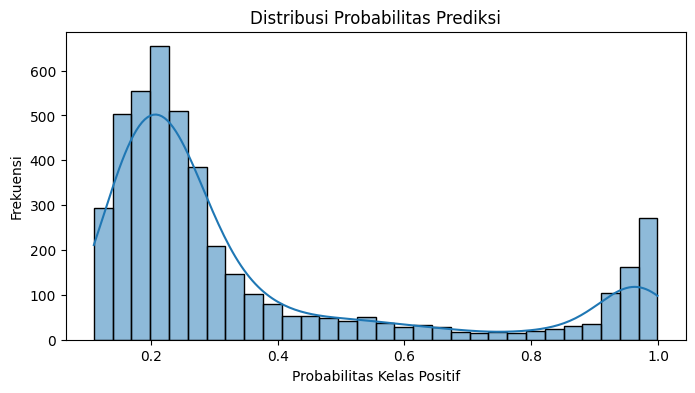

array([0.18417917, 0.32735279, 0.23439171, ..., 0.26022782, 0.15104557,
       0.20375724])

In [34]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    """
    Evaluasi model terhadap test set (X_test, y_test) dan tampilkan metrik performa.
    """
    try:
        # Prediksi
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Classification report
        print("=== Classification Report ===")
        print(classification_report(y_test, y_pred))

        # AUC score
        auc_score = roc_auc_score(y_test, y_proba)
        print(f"\nAUC Score: {auc_score:.4f}")

        # Confusion matrix
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))

        # Plot distribusi probabilitas
        plt.figure(figsize=(8, 4))
        sns.histplot(y_proba, bins=30, kde=True)
        plt.title("Distribusi Probabilitas Prediksi")
        plt.xlabel("Probabilitas Kelas Positif")
        plt.ylabel("Frekuensi")
        plt.show()

        return y_proba

    except Exception as e:
        print(f"Error saat evaluasi model: {str(e)}")
        return None
    
evaluate_model(model, X_test, y_test)

Fold 1:
  Train AUC       : 0.8690
  Validation AUC  : 0.7948
Fold 2:
  Train AUC       : 0.8584
  Validation AUC  : 0.7759
Fold 3:
  Train AUC       : 0.8548
  Validation AUC  : 0.8091
Fold 4:
  Train AUC       : 0.8604
  Validation AUC  : 0.8093
Fold 5:
  Train AUC       : 0.8746
  Validation AUC  : 0.7838


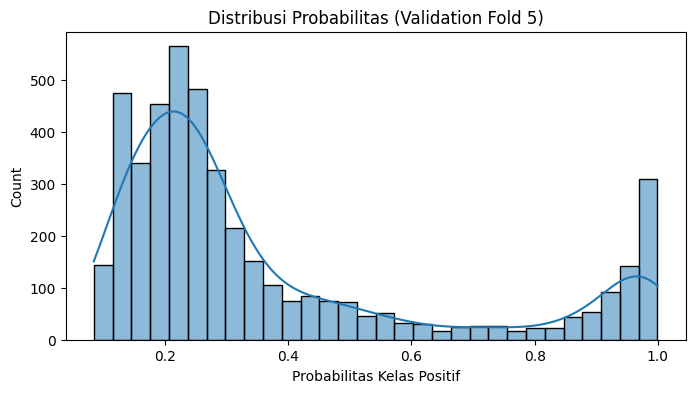


=== Rangkuman AUC ===
Average Train AUC      : 0.8634
Average Validation AUC : 0.7946


In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def full_model_evaluation(X, y, model, n_splits=5, plot_last_fold=True):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_train_scores = []
    auc_val_scores = []

    for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # Prediksi probabilitas
        y_proba_train = model.predict_proba(X_train)[:, 1]
        y_proba_val = model.predict_proba(X_test)[:, 1]

        # Hitung AUC
        auc_train = roc_auc_score(y_train, y_proba_train)
        auc_val = roc_auc_score(y_test, y_proba_val)

        auc_train_scores.append(auc_train)
        auc_val_scores.append(auc_val)

        print(f"Fold {i+1}:")
        print(f"  Train AUC       : {auc_train:.4f}")
        print(f"  Validation AUC  : {auc_val:.4f}")

        # Optional: Plot distribusi pada fold terakhir
        if plot_last_fold and i == n_splits - 1:
            plt.figure(figsize=(8, 4))
            sns.histplot(y_proba_val, bins=30, kde=True)
            plt.title(f"Distribusi Probabilitas (Validation Fold {i+1})")
            plt.xlabel("Probabilitas Kelas Positif")
            plt.show()

    print("\n=== Rangkuman AUC ===")
    print(f"Average Train AUC      : {np.mean(auc_train_scores):.4f}")
    print(f"Average Validation AUC : {np.mean(auc_val_scores):.4f}")

    return auc_train_scores, auc_val_scores
train_auc_list, val_auc_list = full_model_evaluation(X, y, model)


# Submission

In [36]:
print_header("Final Model Training & Submission", 1)

def create_robust_submission(model, validation_path, filename='final3_submission.csv'):
    """
    Membuat file submission dengan penanganan data validasi yang robust
    
    Parameters:
    - model: Model yang sudah dilatih
    - validation_path: Path ke file data validasi
    - filename: Nama file output
    
    Returns:
    - DataFrame hasil submission
    """
    try:
        # Load validation data
        val_data = pd.read_csv(validation_path)
        
        # Validasi kolom
        required_columns = X.columns.tolist() + ['customer_number']
        missing_cols = set(required_columns) - set(val_data.columns)
        
        
        if missing_cols:
            raise ValueError(f"Data validasi kehilangan kolom: {missing_cols}")
        
        # Reorder columns to match training data
        val_data = val_data[required_columns]
        
        # Pisahkan ID pelanggan dan fitur
        customer_ids = val_data['customer_number']
        X_val = val_data.drop(columns=['customer_number'])
        
        # Prediksi probabilitas
        proba = model.predict_proba(X_val)[:, 1]
        
        # Buat DataFrame submission
        submission = pd.DataFrame({
            'customer_number': customer_ids,
            'berlangganan_deposito': proba
        })
        
        # Simpan ke file
        submission.to_csv(filename, index=False)
        print(f"\nFile submission berhasil disimpan sebagai {filename}")
        print(f"Statistik submission:")
        print(f"- Probabilitas minimum: {proba.min():.4f}")
        print(f"- Probabilitas maksimum: {proba.max():.4f}")
        print(f"- Rata-rata probabilitas: {proba.mean():.4f}")
        
        return submission
        
    except FileNotFoundError:
        print(f"File {validation_path} tidak ditemukan!")
    except Exception as e:
        print(f"Error saat membuat submission: {str(e)}")
        return None

# Generate submission file
try:
    print("\nMembuat file submission...")
    submission = create_robust_submission(
        model=model,
        validation_path='validation_set.csv',
        filename='DCM_DMU_2025_Model_dio jambu.csv'
    )
    
    # Tampilkan preview submission
    if submission is not None:
        print("\nPreview submission:")
        display(submission.head())
    
except Exception as e:
    print(f"Error dalam proses submission: {str(e)}")

# Final Model Training & Submission


Membuat file submission...

File submission berhasil disimpan sebagai DCM_DMU_2025_Model_dio jambu.csv
Statistik submission:
- Probabilitas minimum: 0.0911
- Probabilitas maksimum: 0.9993
- Rata-rata probabilitas: 0.3589

Preview submission:


,customer_number,berlangganan_deposito
0,445420,0.225331
1,585604,0.136113
2,888824,0.125891
3,816820,0.118402
4,542716,0.323085
